#**week1 授業課題1　曽呂利新左衛門問題**

テキストの目的
基礎的なプログラミング力を確認する
見やすいコードを書けるようにする

どのように学ぶか
Python入門課題の発展です。関数作成やコメントの入れ方などを工夫し、見やすいコードを作っていってください。

>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

**【問題1】100日目の米粒の数**<br>
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [1]:
day = 100
get_rice= 1
dayly_rice = []
total_rice = []

for i in range(day-1):
  get_rice = get_rice * 2
  dayly_rice.append(get_rice)
  dayly_total_rice = sum(dayly_rice)
  total_rice.append(dayly_total_rice)


print("{}日目にもらうお米は{}粒".format(days,get_rice))
print("{}日目までにもらう累計米数は{}粒".format(days,dayly_total_rice))

NameError: ignored

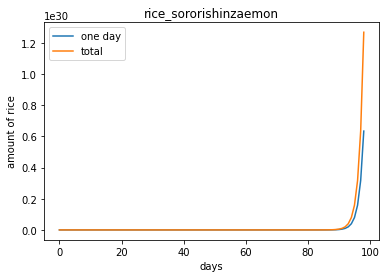

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("rice_sororishinzaemon")
plt.xlabel("days")
plt.ylabel("amount of rice")
plt.plot(dayly_rice, label="one day")
plt.plot(total_rice, label="total")
plt.legend()
plt.show()

**【問題2】100日目以外の米粒の数**<br>
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

100日後にもらう米の数： 633825300114114700748351602688粒
100日後に合計でもらっている米の数： 1267650600228229401496703205375粒


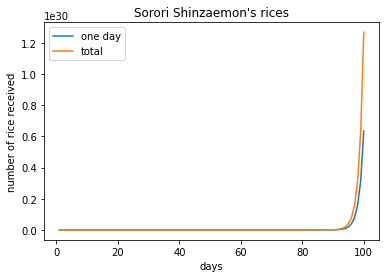

In [3]:
def compute_sorori_shinzaemon(day=100, n_first_day_rices=1):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)
    n_first_day_rices: int
        1日目に貰う米の数(default : 1)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """

    list_n_grains  = [n_first_day_rices]
    list_total_grains = [list_n_grains[0]] 
    for i in range(day-1):
        list_n_grains.append(list_n_grains[-1]*2)
        list_total_grains.append(list_total_grains[-1] + list_n_grains[-1])

    return list_n_grains, list_total_grains

day = 100 # まずは問題1と同じになるか確認

list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=day)

print("{}日後にもらう米の数： {}粒".format(day, list_n_grains[-1]))
print("{}日後に合計でもらっている米の数： {}粒".format(day, list_total_grains[-1]))

plt.title("Sorori Shinzaemon's rices")
plt.xlabel("days")
plt.ylabel("number of rice received")
plt.plot(range(1, day + 1), list_n_grains, label="one day") 
plt.plot(range(1, day + 1), list_total_grains, label="total") 
plt.legend() 
plt.show()

120日後にもらう米の数： 664613997892457936451903530140172288粒
120日後に合計でもらっている米の数： 1329227995784915872903807060280344575粒


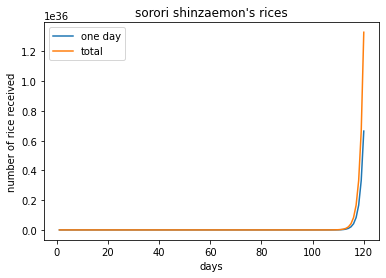

In [4]:
day = 120 # 受講する日数は厳密でなくて良い

list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=day)

print("{}日後にもらう米の数： {}粒".format(day, list_n_grains[-1]))
print("{}日後に合計でもらっている米の数： {}粒".format(day, list_total_grains[-1]))

plt.title("sorori shinzaemon's rices")
plt.xlabel("days")
plt.ylabel("number of rice received")
plt.plot(range(1, day + 1), list_n_grains, label="one day") 
plt.plot(range(1, day + 1), list_total_grains, label="total") 
plt.legend()
plt.show()

**【問題3】何人が何日生活できる米か**<br>
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

（解説）

米の数を計算する関数は問題2で作成しているので、この結果を引数とする新たな関数を作成します。

必要な米粒の数や、1日のカロリーは根拠がしっかりとしていればどのような値でもOKです。


In [5]:
calories_of_rice = 168*1000/((100/2.3)/0.02)
print("1粒あたり{}カロリー".format(calories_of_rice))

1粒あたり77.28カロリー


In [7]:
def sorori_shinzaemon(n_grains, n_people, calories_of_rice=77.28, calories_needed_per_day=2200*1000):
    total_calories = n_grains*calories_of_rice
    total_calories_needed_per_day = n_people*calories_needed_per_day
    
    days = total_calories/total_calories_needed_per_day

    return days

day = 120
n_people = 12

_, list_total_grains = compute_sorori_shinzaemon(day=day) # 問題2の関数をそのまま使う。使わない返り値は_と置いておく。

days_to_live = sorori_shinzaemon(list_total_grains[-1], n_people)

print("{}人が{}日暮らせます。".format(n_people, days_to_live))
print("この時の米粒の数：{}".format(list_total_grains[-1]))

12人が3.891012860388572e+30日暮らせます。
この時の米粒の数：1329227995784915872903807060280344575
